In [1]:
import tensorflow as tf
from google.colab import drive
from google.colab import files
import os
import cv2
import random
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath=os.listdir('drive/MyDrive/LFCC')
for sub in filepath:
  print(sub)

Person 1
Person 2
Person 3


In [3]:
train_dir='drive/MyDrive/LFCC'
training_data=[]

In [4]:
def create_trainingdata():
    categories=os.listdir(train_dir)
    for sub in categories:
        path=os.path.join(train_dir,sub)
        class_num=categories.index(sub)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            new_array=cv2.resize(img_array,(250,250))
            training_data.append([new_array,class_num])

In [5]:
create_trainingdata()

In [6]:
random.shuffle(training_data)

In [7]:
X=[]
Y=[]
for features,label in training_data:
    X.append(features)
    Y.append(label)

X=np.array(X).reshape(-1,250,250,3)
Y=np.array(Y).reshape(-1,1)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [14]:
cnn=tf.keras.Sequential([
        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(250,250,3)),
        tf.keras.layers.MaxPooling2D(2,2),
      
        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),    
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.04),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(5, activation="softmax")
        ])

cnn.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])   

In [15]:
model1=cnn.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
54/54 [==============================] - 5s 91ms/step - loss: 20.2904 - accuracy: 0.7556 - val_loss: 0.4573 - val_accuracy: 0.8169
Epoch 2/50
54/54 [==============================] - 5s 86ms/step - loss: 0.4188 - accuracy: 0.8373 - val_loss: 0.1875 - val_accuracy: 0.9437
Epoch 3/50
54/54 [==============================] - 5s 86ms/step - loss: 0.2599 - accuracy: 0.9136 - val_loss: 0.1612 - val_accuracy: 0.9472
Epoch 4/50
54/54 [==============================] - 5s 86ms/step - loss: 0.1548 - accuracy: 0.9471 - val_loss: 0.1636 - val_accuracy: 0.9437
Epoch 5/50
54/54 [==============================] - 5s 86ms/step - loss: 0.1620 - accuracy: 0.9489 - val_loss: 0.1526 - val_accuracy: 0.9472
Epoch 6/50
54/54 [==============================] - 5s 86ms/step - loss: 0.1460 - accuracy: 0.9565 - val_loss: 0.1953 - val_accuracy: 0.9472
Epoch 7/50
54/54 [==============================] - 5s 86ms/step - loss: 0.4082 - accuracy: 0.8890 - val_loss: 0.3463 - val_accuracy: 0.9032
Epoch 8/50
5

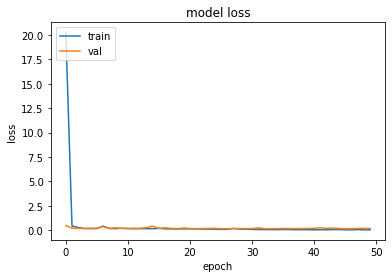

In [16]:
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
cnn.save("CNNLFCC.h5")

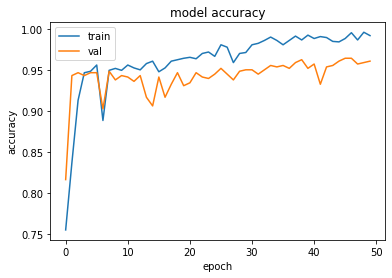

In [18]:
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
model_pred=cnn.predict(x_test)
model_pred=np.argmax(model_pred[:20],axis=1)
actual=y_test[:20].reshape(-1)

print("Prediction:")
print(model_pred)
print("Actual :")
print(actual)

Prediction:
[2 2 1 0 0 0 1 2 0 1 0 2 1 0 2 2 1 2 2 1]
Actual :
[2 2 1 0 0 0 1 2 0 1 0 2 1 0 2 2 1 0 2 1]


In [21]:
test_loss,test_acc=cnn.evaluate(x_test,y_test)

18/18 [==============================] - 1s 34ms/step - loss: 0.1603 - accuracy: 0.9613
